# 1.Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2.Load dataset

In [2]:
df = pd.read_csv("heart_super_clean.csv")
df.head()

# Dataset info
print("Dataset Shape:", df.shape)
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum().sum())

# Class distribution (check for imbalance)
print("\nClass Distribution (HeartDisease):\n")
print(df['HeartDisease'].value_counts(normalize=True))

Dataset Shape: (918, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_M              918 non-null    float64
 7   ChestPainType_ATA  918 non-null    float64
 8   ChestPainType_NAP  918 non-null    float64
 9   ChestPainType_TA   918 non-null    float64
 10  RestingECG_Normal  918 non-null    float64
 11  RestingECG_ST      918 non-null    float64
 12  ExerciseAngina_Y   918 non-null    float64
 13  ST_Slope_Flat      918 non-null    float64
 14  ST_Slope_Up        918 non-null    float64
 15  HeartDisease       918 non-null    int64  
dtypes

# 3.Preprocessing

In [3]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 734
Test set size: 184


# 4.Model (Naive Bayes)

In [4]:
model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


# 5. Predictions

In [5]:
y_pred = model.predict(X_test)

results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("First 20 Predictions vs Actual:")
print(results_df.head(20))

First 20 Predictions vs Actual:
     Actual  Predicted
356       1          1
763       1          0
817       1          1
735       1          1
892       0          0
795       0          0
234       0          0
383       1          1
642       0          0
454       1          1
313       1          0
257       0          0
208       0          0
75        0          0
821       0          0
535       1          1
83        0          0
493       1          1
169       0          0
449       1          1


# 6.Evaluation

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy* 100:.4f}%")

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 91.3043%

Confusion Matrix:

[[75  7]
 [ 9 93]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.93      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



# 7. Visualizations

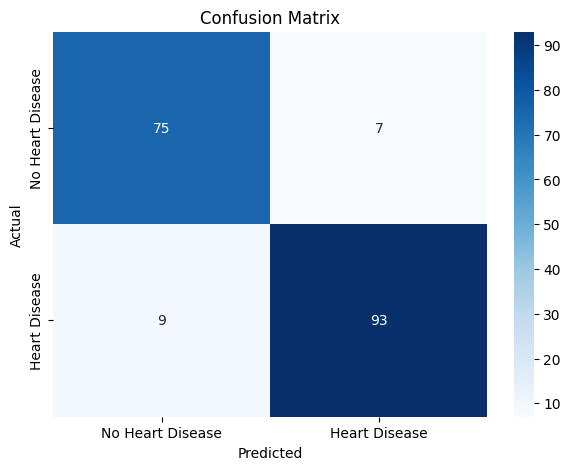

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9.Final Summery

In [10]:
print("FINAL SUMMARY")
print("-" * 30)

print("Dataset is clean (no missing values).")
print("All features are numeric and already encoded.")
print("No scaling, encoding, balancing, or outlier handling was required.")
print("Gaussian Naive Bayes was suitable for this dataset.")
print("Evaluation was done using:")
print("   - Accuracy")
print("   - Confusion Matrix")
print("   - Precision, Recall, and F1-score")

print("\nConclusion:")
print("Naive Bayes can be successfully applied directly on this dataset with reliable performance.")


FINAL SUMMARY
------------------------------
Dataset is clean (no missing values).
All features are numeric and already encoded.
No scaling, encoding, balancing, or outlier handling was required.
Gaussian Naive Bayes was suitable for this dataset.
Evaluation was done using:
   - Accuracy
   - Confusion Matrix
   - Precision, Recall, and F1-score

Conclusion:
Naive Bayes can be successfully applied directly on this dataset with reliable performance.
